In [1]:
#导入包

In [3]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from matplotlib import pyplot as plt

In [ ]:
#载入训练好的词向量

In [2]:
wiki_model = Word2Vec.load('cbow_word2vec_wiki_model')

In [ ]:
#查看近义词的词向量

In [7]:
wiki_model.most_similar('说', topn=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('无奈', 0.9992125630378723),
 ('照顾', 0.9986647963523865),
 ('萌生', 0.9986380338668823),
 ('争吵', 0.9984942674636841),
 ('强姦', 0.997301459312439),
 ('潜伏', 0.9972546696662903),
 ('曝', 0.9971020221710205),
 ('假冒', 0.9966201782226562),
 ('济弱', 0.9963237047195435),
 ('酒后', 0.9958178400993347),
 ('离去', 0.9957506060600281),
 ('一路上', 0.9947607517242432),
 ('死囚', 0.9947358965873718),
 ('博取', 0.9947072267532349),
 ('追问', 0.9946908950805664),
 ('鞠躬', 0.9945878982543945),
 ('出外', 0.9945663213729858),
 ('逃脱', 0.9945054054260254),
 ('耶稣', 0.994263231754303),
 ('神圣', 0.9942300319671631)]

In [ ]:
#词向量作图

In [4]:
def tsne_plot(model):
    tokens=[]
    labels=[]
    i = 0
    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        if i>500:break
        i += 1

    tsne_model = TSNE(n_components=2,perplexity=30,init='pca',random_state=23)    
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

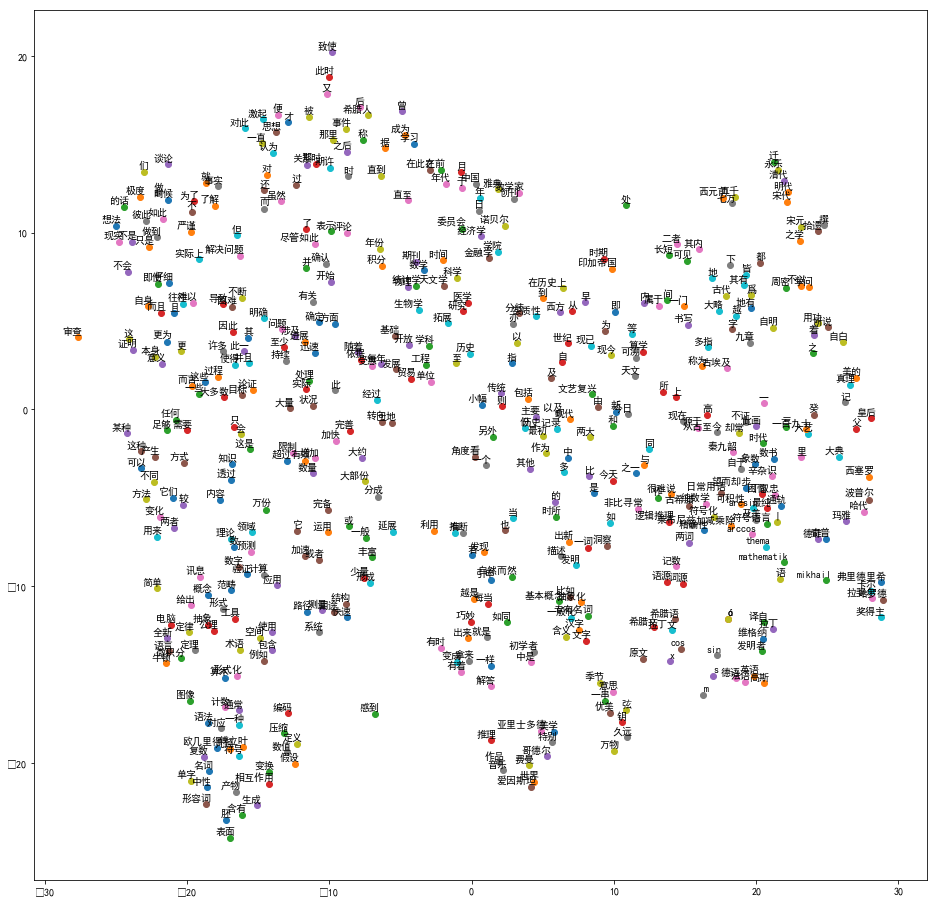

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']
tsne_plot(wiki_model)

In [6]:
plt.savefig('词向量图.png')

<Figure size 432x288 with 0 Axes>